## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)
#print (y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Alternative preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset[['Charge_type', 'Charge_size', 'Standoff_distance']]
y = dataset['Incident_pressure']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Charge_type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (new_feature_names)
print (X)

#Turning back into a dataframe
X = pd.DataFrame(X, columns= new_feature_names)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print (X_train)

    Charge_type  Charge_size  Standoff_distance
0           TNT          0.5                1.5
1           TNT          0.5                2.5
2           TNT          0.5                3.5
3           TNT          0.5                4.5
4           TNT          0.5                5.5
..          ...          ...                ...
541       CompB         25.0               16.0
542       CompB         25.0               17.0
543       CompB         25.0               18.0
544       CompB         25.0               19.0
545       CompB         25.0               20.0

[546 rows x 3 columns]
['encoder__Charge_type_CompB' 'encoder__Charge_type_TNT'
 'remainder__Charge_size' 'remainder__Standoff_distance']
[[ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 [ 0.   1.   0.5  3.5]
 ...
 [ 1.   0.  25.  18. ]
 [ 1.   0.  25.  19. ]
 [ 1.   0.  25.  20. ]]
     encoder__Charge_type_CompB  encoder__Charge_type_TNT  \
0                           0.0                       1.0   
1                  

## Calling the XGB Regressor

In [2]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [4]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900],
               'max_depth': [2, 3, 4, 5, 6, 7, 8],
               'gamma': [5, 1, 0.1, 0.01, 0.001, 0.0001],
               'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5, 0.9]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.983230710334755
Best Parameters: {'gamma': 0.01, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 1600}


## Training the XGB Regression model on the Training set

In [3]:
regressor = XGBRegressor(n_estimators = 1600,
                         max_depth = 2,
                         gamma = 0.01, 
                         learning_rate = 0.5,
                         random_state = 67)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1600,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=67,
             reg_alpha=0, reg_lambda=1, ...)

## Create a KFold object with 5 splits 

In [4]:
#regressor.fit (X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())

[0.98111663 0.9958024  0.99572885 0.95905941 0.98444626]
0.983230710334755


## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 20.74  20.56]
 [321.04 323.97]
 [117.91 114.25]
 [ 57.28  74.26]
 [295.04 293.22]
 [128.66 136.86]
 [ 92.96  99.  ]
 [140.32 138.  ]
 [364.99 385.24]
 [ 95.29 103.36]
 [143.75 148.77]
 [235.8  239.61]
 [ 89.1   90.43]
 [ 30.92  33.86]
 [177.9  170.01]
 [ 27.86  27.91]
 [ 62.25  61.02]
 [ 21.21  22.34]
 [ 29.72   3.04]
 [ 64.89  71.26]
 [374.89 377.38]
 [ 77.41  79.63]
 [ 67.85  73.54]
 [ 42.88  40.54]
 [206.55 204.93]
 [ 26.52  28.38]
 [179.14 159.3 ]
 [ 70.52  74.79]
 [107.55 103.92]
 [ 64.44  65.63]
 [167.71 164.29]
 [ 53.91  52.29]
 [ 48.76  48.96]
 [  3.52   5.49]
 [152.03 151.27]
 [ 51.56  54.48]
 [102.7   96.38]
 [105.37 105.61]
 [ 56.41  64.6 ]
 [103.21  97.63]
 [ 55.23  51.99]
 [101.52  95.93]
 [271.8  271.69]
 [120.5  118.52]
 [169.96 142.84]
 [128.23 124.71]
 [136.63 135.44]
 [ 28.06  24.41]
 [ 16.94  17.94]
 [334.25 367.34]
 [ 46.66  49.1 ]
 [128.68 136.91]
 [ 67.94  67.7 ]
 [206.15 202.75]
 [344.94 343.73]
 [ 88.74  85.17]
 [172.32 172.47]
 [180.92 179.97]
 [ 16.87  15.0

## SHAP

In [7]:
import shap
print (shap.__version__)

0.41.0


In [8]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

In [9]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


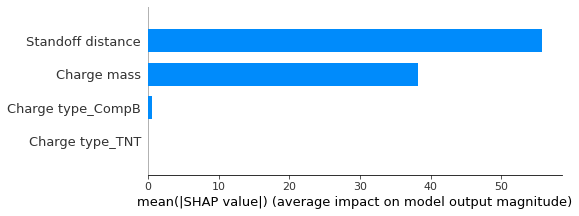

None


<Figure size 1440x360 with 0 Axes>

In [10]:
#Summary plot type 1
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names = features, plot_type="bar")
print (plt.gcf().set_size_inches(20,5))

[1]
labels ['']


Text(482.5464500000001, 0.5, 'Feature value')

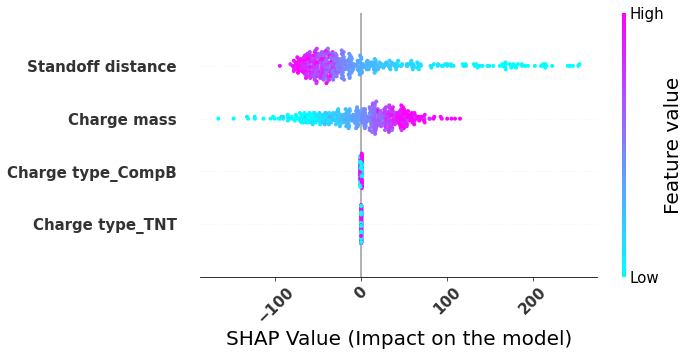

In [11]:
#Summary plot type 2
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
print (plt.get_fignums())
print ("labels",plt.get_figlabels())
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.xlim([-3000,7000])
plt.xticks(rotation=45)
#cb = plt.colorbar()
#cb.set_ticks([2,19])

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
#cb_ax.set_aspect(aspect = 1)
#print (cb_ax.get_xlim())
#print (cb_ax.get_ylim())
#print (cb_ax.get_xbound())
#print (cb_ax.get_ybound())
#cb_ax.set_xlim(0,0.0001)

#cb.set_xticklabels(['Low', 'High'])
#ax.cb.set_label("Feature Values",fontsize = 20)

AttributeError: 'function' object has no attribute 'info'

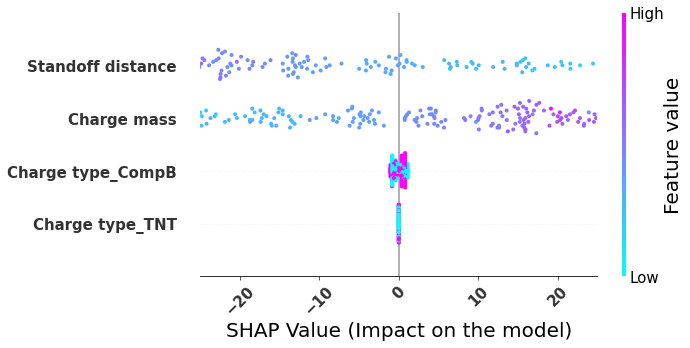

In [12]:
#Summary plot type 3
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.xlim([-25,25])
plt.xticks(rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
shap.summary_plot.info()

(array([295.04, 295.04]),
 [Text(295.0372314453125, 1, '$f(x)$'),
  Text(295.0372314553125, 1, '$ = 295.037$')])

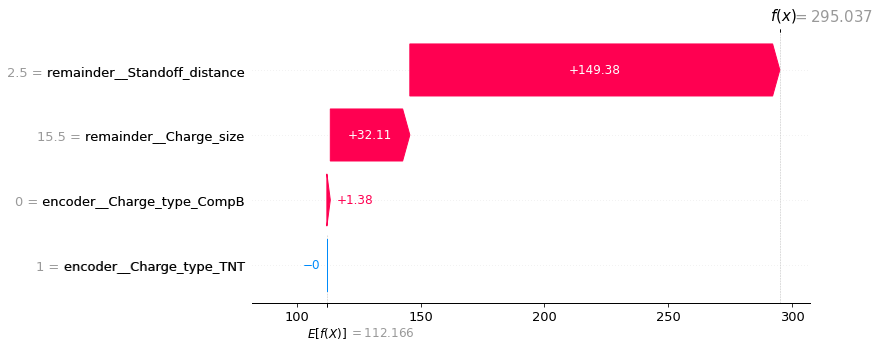

In [13]:
#print (X_test)
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
#print (X_test)
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)

shap.waterfall_plot(shap_values2[4], show=False)
#plt.gcf()
#print (plt.get_fignums())


plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

.values =
array([  0.8 ,   0.  , -38.54, -47.91])

.base_values =
112.16555595397949

.data =
array([ 1.,  0.,  4., 15.])

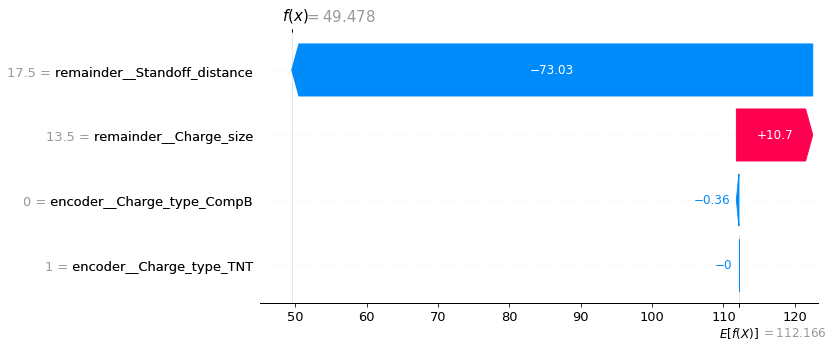

In [19]:
shap.waterfall_plot(shap_values2[97], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')
shap_values2[25]

(array([172.32, 172.32]),
 [Text(172.32374572753906, 1, '$f(x)$'),
  Text(172.32374573753907, 1, '$ = 172.324$')])

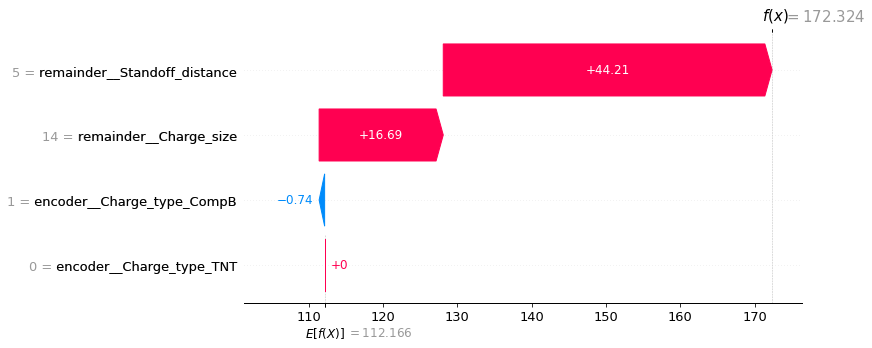

In [15]:
shap.waterfall_plot(shap_values2[56], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

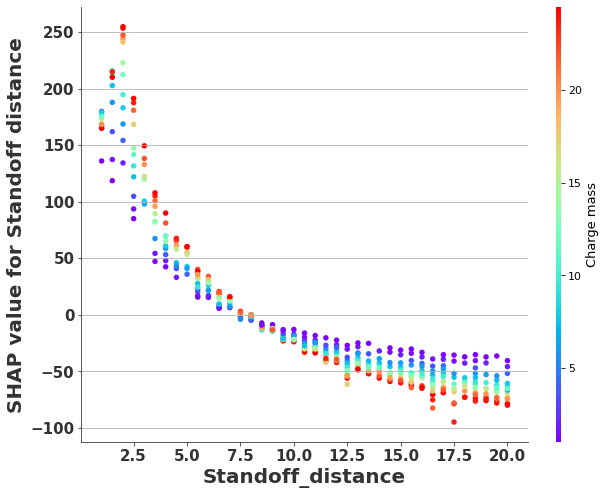

In [16]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff_distance",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')
plt.colorbar(fontsize = 15)

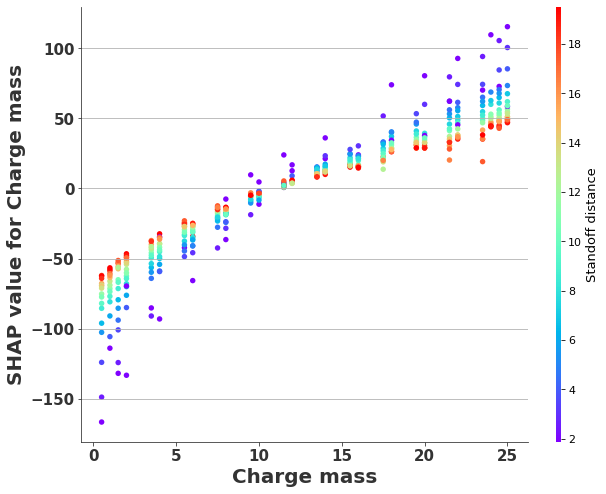

In [17]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

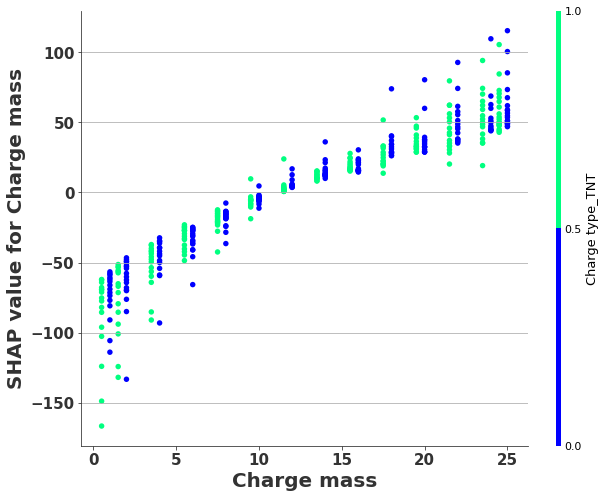

In [18]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')